In [ ]:
# torch.nn.Conv2d() ,一种是torch.nn.functional.conv2d()
# 这两种的输入要求一样，首先要输入一个torch.autograd.Variable() 的类型，大小是(batch,channel,H,w)

In [9]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
im=Image.open("cat.png").convert("L") # 读入灰度图片
im=np.array(im,dtype="float32")# 将其转换为矩阵


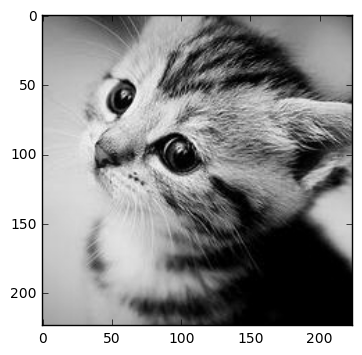

In [4]:
# 可视化
plt.imshow(im.astype('uint8'),cmap="gray")

In [5]:
# 将图片转为tensor 并适配卷积输入的要求
im=torch.from_numpy(im.reshape((1,1,im.shape[0],im.shape[1])))

In [11]:
# 定义一个算子，对其进行轮廓检测
#使用nn.Conv2d
conv1=nn.Conv2d(1,1,3,bias=False)# 定义卷积
sobel_kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],dtype="float32") # 定义轮廓检测算子
sobel_kernel=sobel_kernel.reshape((1,1,3,3))
conv1.weight.data=torch.from_numpy(sobel_kernel)# 给卷积的kernel 赋值
edge1=conv1(Variable(im))# 作用在图片上
edge1=edge1.data.squeeze().numpy() #  将输出转换为图片的格式

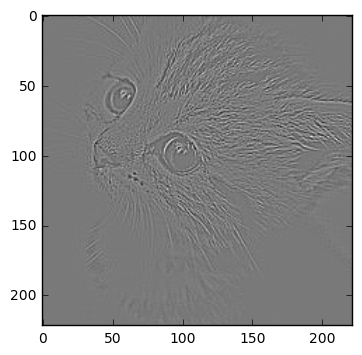

In [12]:
# 可视化边缘检测后的结果
plt.imshow(edge1,cmap="gray")

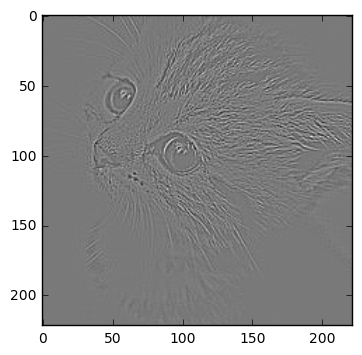

In [13]:
# 使用F.conv2d
sobel_kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],dtype="float32") # 定义轮廓检测算子
sobel_kernel=sobel_kernel.reshape((1,1,3,3))
weight=Variable(torch.from_numpy(sobel_kernel))
edge2=F.conv2d(Variable(im),weight)# 作用在图片上
edge2=edge2.data.squeeze().numpy() 
plt.imshow(edge2,cmap="gray")

In [14]:
#nn.Conv2d() 是直接定义了一层卷积网络结构，默认定义一个随机初始化的weight ，如果需要修改，需要去除其中的值对其进行修改，如果不想修改，
#可以直接使用这个值，torch.nn.functional.conv2d() 相当于定义了一个卷积操作，后者需要额外在去1定义一个weight，这个weight 也需要是个Variable

In [15]:
#（2） 池化层，一种是nn.MaxPool2d() 一种是torch.nn.functional.max_pool2d()
# 使用nn.MaxPool2d
pool1=nn.MaxPool2d(2,2)
print(im.shape[2],im.shape[3])
small_im1=pool1(Variable(im))
small_im1=small_im1.data.squeeze().numpy()
print(small_im1.shape[0],small_im1.shape[1])

224 224
112 112


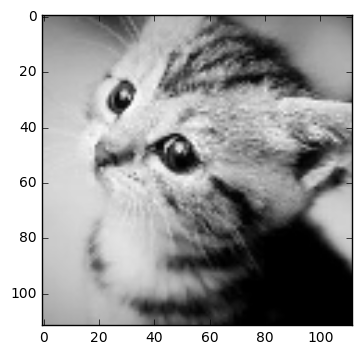

In [16]:
# 可视化
plt.imshow(small_im1,cmap="gray")

224 224
112 112


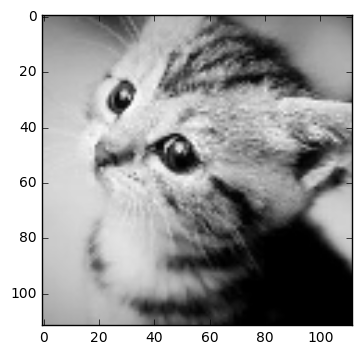

In [17]:
# F.max_pool2d
print(im.shape[2],im.shape[3])
small_im2=F.max_pool2d(Variable(im),2,2)
small_im2=small_im2.data.squeeze().numpy()
print(small_im1.shape[0],small_im2.shape[1])
plt.imshow(small_im2,cmap="gray")